**Predictive modeling including steps:**
1. Prepare Problem
 - Load libraries
 - Load dataset
2. Summarize Data
 - Descriptive statistics
 - Data visualizations
3. Prepare Data
 - Data Cleaning
 - Feature Selection
 - Data Transforms
4. Evaluate Algorithms
 - Split-out validation dataset
 - Test options and evaluation metric
 - Spot-Check Algorithms
 - Compare Algorithms
5. Improve Accuracy
 - Algorithm Tuning
 - Ensembles
6. Finalize Model
 - Predictions on validation dataset
 - Create standalone model on entire training dataset
 - Save model for later use

In [1]:
%matplotlib inline

## Prepare Problem

In [2]:
import matplotlib
matplotlib.use('Agg')

/Users/thuongdinh/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# Load libraries
import time
import pandas as pd
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import cross_validation
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [4]:
# config for show max number of output lines
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

In [5]:
seed = 7

In [6]:
from helper.load_data import load_data
Y, X = load_data(train=True, SEED=seed, scale=True,
              minmax=False,
              nointercept=True,
              engineering=False)

## Evaluate Algorithms

In [7]:
# Split-out validation dataset
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

### Tuning Row Subsampling

In [8]:
# fit model no training data
model = XGBClassifier()
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(subsample=subsample)
kfold = StratifiedKFold(Y_train, n_folds=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="log_loss", n_jobs=-1, cv=kfold)
result = grid_search.fit(X_train, Y_train)

In [9]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: -0.509350 using {'subsample': 0.1}


-0.509350 (0.077856) with: {'subsample': 0.1}
-0.529664 (0.087890) with: {'subsample': 0.2}
-0.522570 (0.072762) with: {'subsample': 0.3}
-0.528944 (0.078976) with: {'subsample': 0.4}
-0.527875 (0.070705) with: {'subsample': 0.5}
-0.537439 (0.071634) with: {'subsample': 0.6}
-0.539250 (0.067821) with: {'subsample': 0.7}
-0.548293 (0.075875) with: {'subsample': 0.8}
-0.546758 (0.062205) with: {'subsample': 1.0}


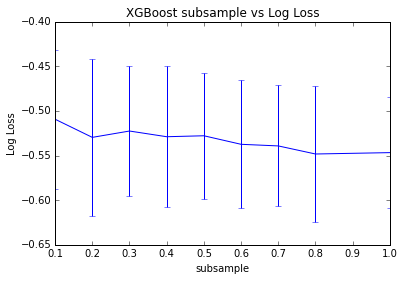

In [10]:
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
    stdev = scores.std()
    means.append(mean_score)
    stdevs.append(stdev)
    print("%f (%f) with: %r" % (mean_score, stdev, params))
# plot
pyplot.errorbar(subsample, means, yerr=stdevs)
pyplot.title("XGBoost subsample vs Log Loss")
pyplot.xlabel( 'subsample' )
pyplot.ylabel( 'Log Loss' )

### Tuning Column Subsampling By Tree

In [11]:
colsample_bytree = [0.6, 0.7, 0.8, 1.0]
param_grid = dict(colsample_bytree=colsample_bytree)
kfold = StratifiedKFold(Y_train, n_folds=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="log_loss", n_jobs=-1, cv=kfold)
result = grid_search.fit(X_train, Y_train)

In [12]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: -0.538803 using {'colsample_bytree': 0.8}


-0.541386 (0.062815) with: {'colsample_bytree': 0.6}
-0.541386 (0.062815) with: {'colsample_bytree': 0.7}
-0.538803 (0.064350) with: {'colsample_bytree': 0.8}
-0.546758 (0.062205) with: {'colsample_bytree': 1.0}


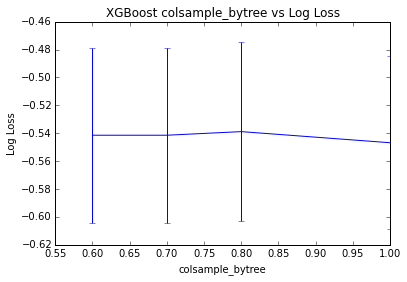

In [14]:
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
    stdev = scores.std()
    means.append(mean_score)
    stdevs.append(stdev)
    print("%f (%f) with: %r" % (mean_score, stdev, params))
# plot
pyplot.errorbar(colsample_bytree, means, yerr=stdevs)
pyplot.title("XGBoost colsample_bytree vs Log Loss")
pyplot.xlabel('colsample_bytree')
pyplot.ylabel('Log Loss')

### Tuning Imbalanced

In [15]:
max_delta_step = range(0, 11) # 1 -> 10
param_grid = dict(max_delta_step=max_delta_step)
kfold = StratifiedKFold(Y_train, n_folds=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="log_loss", n_jobs=-1, cv=kfold)
result = grid_search.fit(X_train, Y_train)

In [16]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: -0.543306 using {'max_delta_step': 1}


### Tuning Max Depth

In [17]:
max_depth = range(3, 11) # 3 -> 10
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(Y_train, n_folds=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="log_loss", n_jobs=-1, cv=kfold)
result = grid_search.fit(X_train, Y_train)

In [18]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: -0.546758 using {'max_depth': 3}


Equal default, so don't need to Ensemble

### Tuning min_child_weight

In [19]:
min_child_weight = range(1, 11) # 3 -> 10
param_grid = dict(min_child_weight=min_child_weight)
kfold = StratifiedKFold(Y_train, n_folds=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="log_loss", n_jobs=-1, cv=kfold)
result = grid_search.fit(X_train, Y_train)

In [20]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: -0.516063 using {'min_child_weight': 8}


### Ensemble all tuning params

In [21]:
max_delta_step = range(0, 11) # 1 -> 10
colsample_bytree = [0.6, 0.7, 0.8, 1.0]
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
min_child_weight = range(1, 11) # 3 -> 10
param_grid = dict(
    max_delta_step=max_delta_step,
    colsample_bytree=colsample_bytree,
    subsample=subsample,
    min_child_weight=min_child_weight
)
kfold = StratifiedKFold(Y_train, n_folds=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="log_loss", n_jobs=-1, cv=kfold)
result = grid_search.fit(X_train, Y_train)

In [22]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: -0.499299 using {'max_delta_step': 0, 'colsample_bytree': 0.6, 'min_child_weight': 9, 'subsample': 0.3}


## Finalize Model

In [31]:
model = XGBClassifier(colsample_bytree=0.8, subsample=0.1, max_delta_step=1)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=1, max_depth=3,
       min_child_weight=1, n_estimators=100, nthread=-1,
       objective='binary:logistic', seed=0, silent=True, subsample=0.1)

In [32]:
# transform the validation dataset
predictions = model.predict(X_validation)
print("Log loss", log_loss(Y_validation, predictions))
print("Accuracy Score", accuracy_score(Y_validation, predictions))
print("Classification Report")
print(classification_report(Y_validation, predictions))

('Log loss', 6.2527370920934935)
('Accuracy Score', 0.81896551724137934)
Classification Report
             precision    recall  f1-score   support

          0       0.83      0.95      0.89        88
          1       0.73      0.39      0.51        28

avg / total       0.81      0.82      0.80       116



## Predict result

In [33]:
X_test, IDs = load_data(train=False, SEED=seed, scale=True,
              minmax=False,
              nointercept=True,
              engineering=False)

In [34]:
preds = model.predict_proba(X_test)

In [35]:
preds = [x[1] for x in preds]

In [36]:
solution = pd.DataFrame({"": IDs, "Made Donation in March 2007": preds})
solution.to_csv("./results/03_machine_learning_xgboost_v01.csv", index = False)

This solution has score 0.4627 on Drivendata (position 424/2051 = top 20%) on Dec. 19, 2016, 4:43 a.m.
With params: colsample_bytree=0.8, subsample=0.1

This solution has score 0.4642 on Drivendata (position 425/2058 = top 20%) on Dec. 20, 2016, 4:43 a.m.
With params: colsample_bytree=0.6, subsample=0.3, max_delta_step=0, min_child_weight=9.

This solution has score 0.4550 on Drivendata (position 361/2058 = top 17%) on Dec. 20, 2016, 4:43 a.m.
With params:colsample_bytree=0.8, subsample=0.1, max_delta_step=1.